In [7]:
import os

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# dowanload data
root_folder = os.path.abspath('../../data')
print(f'root: {root_folder}')

training_data = datasets.FashionMNIST(
    root=root_folder,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=root_folder,
    train=False,
    download=True,
    transform=ToTensor()
)

root: F:\XudongDuan\workspace\Common\AIFramework\data
Using downloaded and verified file: F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\train-images-idx3-ubyte.gz
Extracting F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\train-images-idx3-ubyte.gz to F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw

Using downloaded and verified file: F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw

Using downloaded and verified file: F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw



100.0%

Extracting F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to F:\XudongDuan\workspace\Common\AIFramework\data\FashionMNIST\raw



type: <class 'torchvision.datasets.mnist.FashionMNIST'>


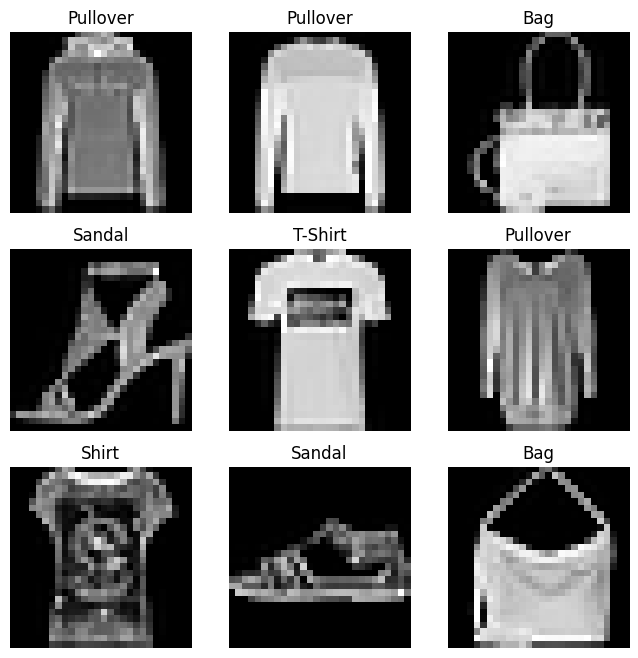

In [14]:
print(f'type: {type(training_data)}')
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
shape: torch.Size([1, 28, 28])


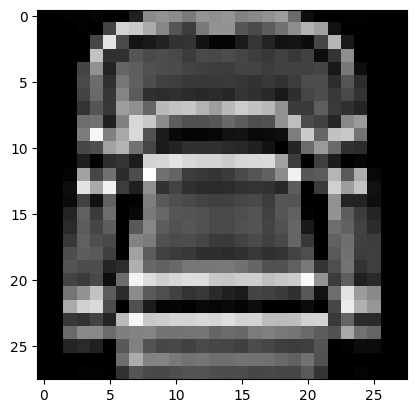

Label: 2


In [16]:
# data loader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
print(f'shape: {img.shape}')
img = img.squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")